In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

C:\Users\Hi\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data=pd.read_csv("IRIS.csv")

In [3]:
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
data.dropna(inplace=True)

In [6]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [7]:
model=Sequential()

In [8]:
model.add(Dense(8,input_shape=(4,),activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(3,activation="softmax"))

C:\Users\Hi\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(loss="categorical_crossentropy",optimizer="adam")

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
data["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [12]:
data.replace({"species":{"Iris-setosa":1,"Iris-versicolor":2,"Iris-virginica":3}},inplace=True)

In [13]:
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [14]:
x=data.drop("species",axis=1)
y=data["species"]

In [15]:
y=np.asarray(y)

In [16]:
encoder=OneHotEncoder(sparse=False)
y=encoder.fit_transform(y.reshape(-1,1))

In [17]:
x.shape

(150, 4)

In [18]:
y.shape

(150, 3)

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [20]:
x_train.shape

(105, 4)

In [21]:
x_test.shape

(45, 4)

In [22]:
y_test.shape

(45, 3)

In [23]:
y_train.shape

(105, 3)

In [24]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),epochs=30)

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 1.2970 - val_loss: 1.1985
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.2445 - val_loss: 1.1810
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.2130 - val_loss: 1.1692
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.1763 - val_loss: 1.1597
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.1457 - val_loss: 1.1522
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.1261 - val_loss: 1.1411
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.1126 - val_loss: 1.1262
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.0909 - val_loss: 1.1130
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.0800 - val_loss: 1.0977
Epoch 10/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.0561 - val_loss: 1.0802
Epoch 11/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.0388 - val_loss: 1.0613
Epoch 12/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.0204 - val_loss: 1.0447
E

In [25]:
losses_df=pd.DataFrame(model.history.history)

<AxesSubplot:>

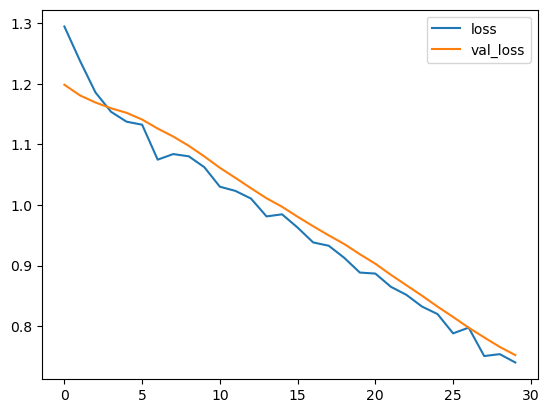

In [26]:
losses_df.plot(kind="line")

In [27]:
predictions=model.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


In [28]:
print(predictions)

[[0.5888086  0.22045594 0.19073537]
 [0.60718274 0.21239172 0.1804255 ]
 [0.61644465 0.20741273 0.17614259]
 [0.5932136  0.2184215  0.18836482]
 [0.1472007  0.38752696 0.46527234]
 [0.10093364 0.39633125 0.50273514]
 [0.64299536 0.19499092 0.16201374]
 [0.5648239  0.23208521 0.20309088]
 [0.10336837 0.39543003 0.50120157]
 [0.16841727 0.38366616 0.44791654]
 [0.5939605  0.21758483 0.18845458]
 [0.57500327 0.22603582 0.19896083]
 [0.6314398  0.20042935 0.16813082]
 [0.16605513 0.38385347 0.4500914 ]
 [0.15948297 0.38699844 0.45351863]
 [0.6254112  0.20306668 0.17152213]
 [0.08686151 0.39700338 0.51613516]
 [0.17558984 0.38200757 0.44240254]
 [0.61645913 0.20745698 0.17608395]
 [0.11091021 0.39611992 0.49296987]
 [0.11656938 0.393871   0.48955962]
 [0.17140701 0.38371754 0.44487542]
 [0.6273179  0.20254315 0.1701389 ]
 [0.11415515 0.39431363 0.49153113]
 [0.10091054 0.39492768 0.5041617 ]
 [0.12233627 0.3906879  0.48697585]
 [0.589852   0.21994607 0.19020201]
 [0.12109492 0.39521247 0.48

In [29]:
print(predictions.shape)

(45, 3)


In [36]:
res=[]
for i in predictions:
    for j in range(len(i)):
        if i[0]>i[1] and i[0]>i[2]:
            res.append(1)
        elif i[1]>i[2]:
            res.append(2)
        else:
            res.append(3)
        

In [37]:
res

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 3,
 3,
 3,
 1,
 1,
 1,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 3,
 3,
 3]